In [1]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
# from d2l import torch as d2l
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
x = torch.arange(4.0)
x.shape

torch.Size([4])

In [5]:
x.requires_grad_(True)
x.grad

In [6]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [7]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [10]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [12]:
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

在运行反向传播函数之后，立即再次运行它，看看会发生什么。

In [22]:
x = torch.arange(4.0, requires_grad=True)
y = x * x
z = y.sum()
z.backward(retain_graph=True)
print(x.grad)
z.backward(retain_graph=True)
print(x.grad)
z.backward()
print(x.grad)

tensor([0., 2., 4., 6.])
tensor([ 0.,  4.,  8., 12.])
tensor([ 0.,  6., 12., 18.])


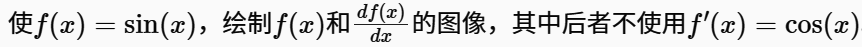

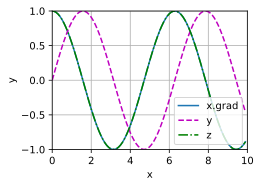

In [11]:
import torch
# from matplotlib import pyplot as plt
from d2l import torch as d2l
x = torch.arange(0, 10, 0.1, requires_grad=True)
y = torch.sin(x)
z = torch.cos(x)
y.sum().backward()
x.grad
# plt.plot(x.detach(), [x.grad, y.detach()])
d2l.plot(x.detach(), [x.grad, y.detach(), z.detach()], xlabel='x', ylabel='y', legend=['x.grad', 'y', 'z'], xlim=[0, 10], ylim=[-1, 1])

概率论

In [2]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [3]:
fair_probs = torch.ones([6]) / 6
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [4]:
multinomial.Multinomial(10000000, fair_probs).sample() # 两个参数分别为抽样次数和概率，这是一个二项分布

tensor([1665640., 1667629., 1669151., 1665610., 1666253., 1665717.])

Text(0, 0.5, 'Estimated probability')

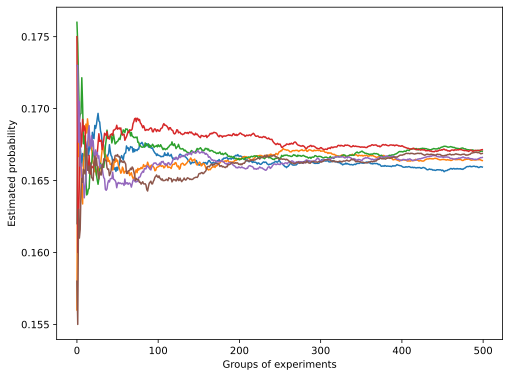

In [16]:
counts = multinomial.Multinomial(1000, fair_probs).sample((500, ))  # sample((6,))表示抽样6组，每组1000次
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
d2l.set_figsize((8, 6))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
# d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')


torch.Size([500, 6])